In [3]:
#Dependencies and Setup
%matplotlib inline
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
from sklearn import datasets


In [4]:
#Study data files
#import files into variables and read the csv files
mouse_metadata=pd.read_csv("data/Mouse_metadata.csv")
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [5]:
study_results=pd.read_csv("data/Study_results.csv")
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
#combine datas into 1 set
mouse_study= pd.merge(mouse_metadata,study_results,on="Mouse ID", how="left")
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
#Rename the columns for much easier access 
mouse_study=mouse_study.rename(columns={"Mouse ID":"Mouse_id","Drug Regimen":"Drug_regimen","Weight (g)":"Weight","Tumor Volume (mm3)":"Tumor_volume","Metastatic Sites":"Metastatic_sites"})
mouse_study.head()

,Mouse_id,Drug_regimen,Sex,Age_months,Weight,Timepoint,Tumor_volume,Metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
#Check the number of mice
mice=mouse_study['Mouse_id'].value_counts()
number_mice=len(mice)
number_mice

249

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice= mouse_study.loc[mouse_study.duplicated(subset=["Mouse_id", "Timepoint",]),'Mouse_id'].unique()                               
duplicate_all_mice= pd.DataFrame(duplicate_mice)
duplicate_all_mice

,0
0,g989


In [88]:
 # Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= mouse_study[mouse_study["Mouse_id"].isin(duplicate_mice)==False]
clean_df



,Mouse_id,Drug_regimen,Sex,Age_months,Weight,Timepoint,Tumor_volume,Metastatic_sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,0,45.000000,0
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1884,z969,Naftisol,Male,9,30,5,49.332999,0
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [19]:
#checking the number of mice is clean data
clean_mice=clean_df["Mouse_id"].value_counts()
clean_mice.count()

248

In [20]:
#Summary Statistics
#Mean data for tumor volume for each regimen
mean_tumor_volume= clean_df.groupby(["Drug_regimen"])["Tumor_volume"].mean()
mean_tumor_volume

Drug_regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor_volume, dtype: float64

In [21]:
#Median data for tumor volume for each regimen
median_tumor_volume= clean_df.groupby(["Drug_regimen"])["Tumor_volume"].median()
median_tumor_volume

Drug_regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor_volume, dtype: float64

In [22]:
#Variance data for tumor volume for each regimen
var_tumor_volume= clean_df.groupby(["Drug_regimen"])["Tumor_volume"].var()
var_tumor_volume

Drug_regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor_volume, dtype: float64

In [23]:
#Standard deviation for tumor volume for each regimen
std_tumor_volume= clean_df.groupby(["Drug_regimen"])["Tumor_volume"].std()
std_tumor_volume

Drug_regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor_volume, dtype: float64

In [24]:
#Calculate the sem for Tumor Volume
sem_tumor_volume= clean_df.groupby(["Drug_regimen"]).sem()["Tumor_volume"]
sem_tumor_volume

Drug_regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor_volume, dtype: float64

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics= pd.DataFrame({"Mean":mean_tumor_volume,
                                   "Median":median_tumor_volume,
                                  "Variance":var_tumor_volume,
                                  "Standard Deviation":std_tumor_volume,
                                   "SEM":sem_tumor_volume})
summary_statistics


,Mean,Median,Variance,Standard Deviation,SEM
Drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [39]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_groupby= clean_df.groupby(("Drug_regimen"))
summary_agg=summary_groupby.agg(['mean','median','var','std','sem'])["Tumor_volume"]
summary_agg

,mean,median,var,std,sem
Drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<IPython.core.display.Javascript object>


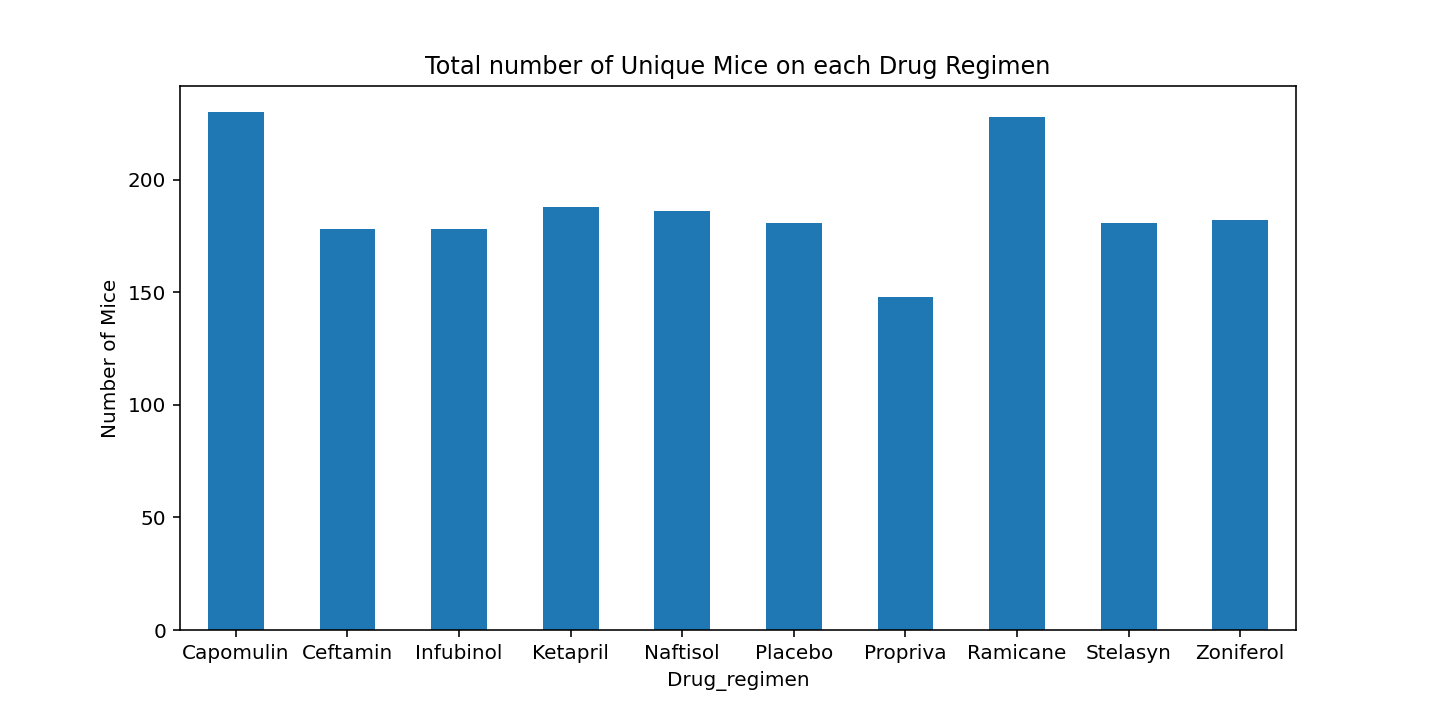

In [26]:
#BAR AND PIE CHARTS
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
unique_mice=clean_df.groupby(["Drug_regimen"])["Mouse_id"].count()
bar_unique_mice= unique_mice.plot.bar(figsize=(10,5),x='Drug Regimen', y='Mice', rot=0)
plt.title("Total number of Unique Mice on each Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()
# unique_mice


<IPython.core.display.Javascript object>


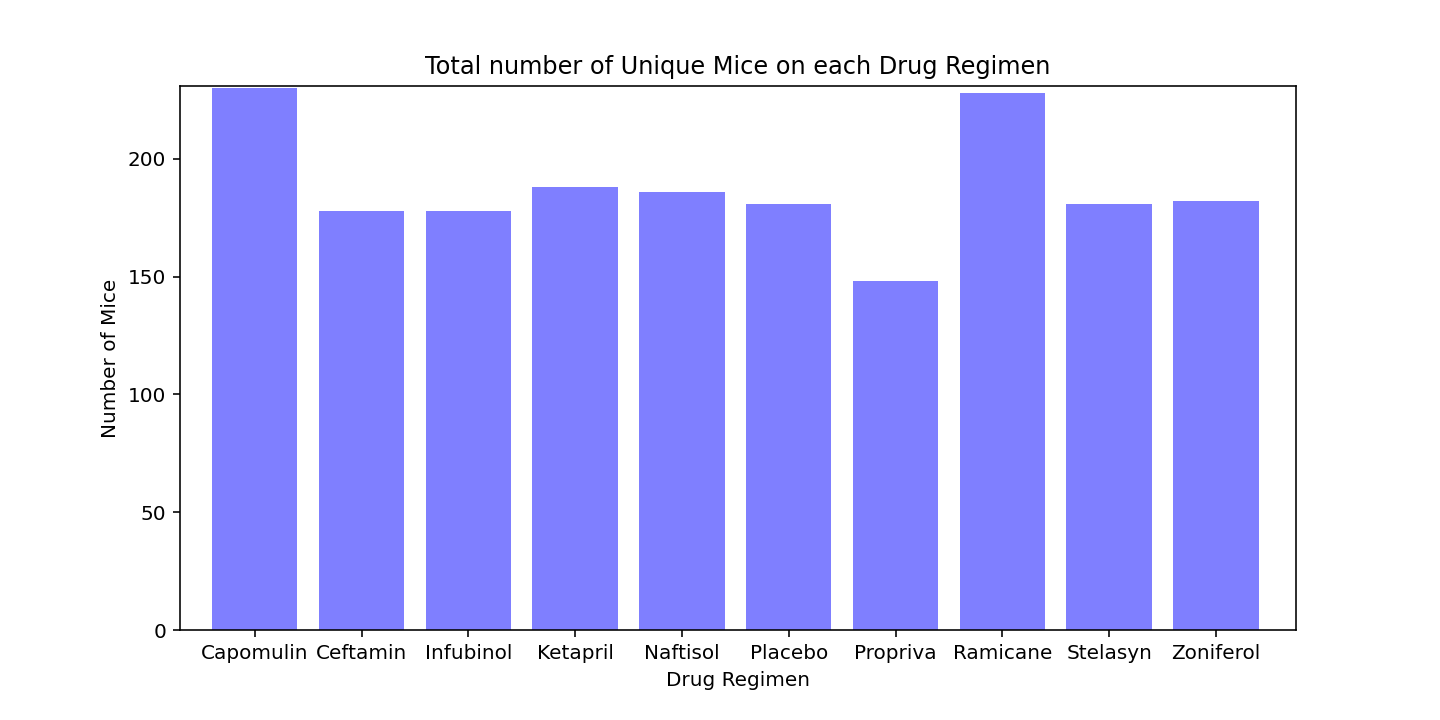

In [27]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice_count=clean_df.groupby(["Drug_regimen"])["Mouse_id"].count().tolist()
mice_count
drug_regimen= ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva",
                "Ramicane","Stelasyn","Zoniferol"]
x_axis=np.arange(len(mice_count))
fig, ax1 = plt.subplots(figsize=(10,5))
plt.bar(x_axis, mice_count,color='b', alpha=0.5, align='center')
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations,drug_regimen)
plt.xlim(-0.70, len(x_axis)-0.25)
plt.ylim(0, max(mice_count)+0.8)
plt.title("Total number of Unique Mice on each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

<IPython.core.display.Javascript object>


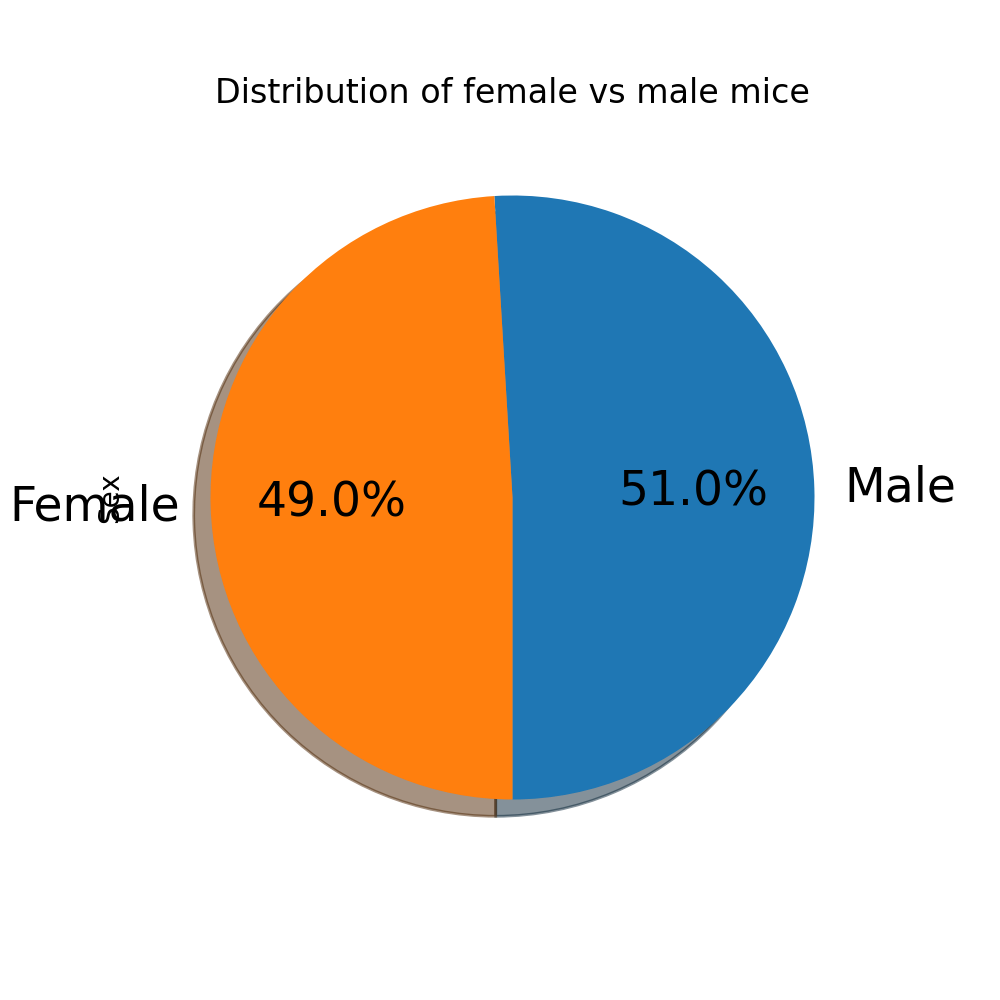

In [28]:
#Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count= clean_df["Sex"].value_counts()
fig=plt.figure(figsize=(5,5), dpi=100)
ax= plt.subplot(111)
gender_count.plot(kind='pie', ax=ax , autopct='%1.1f%%', startangle=270, fontsize=17, y='Gender', title="Distribution of female vs male mice",shadow=True, legend=False)
plt.show()


<IPython.core.display.Javascript object>


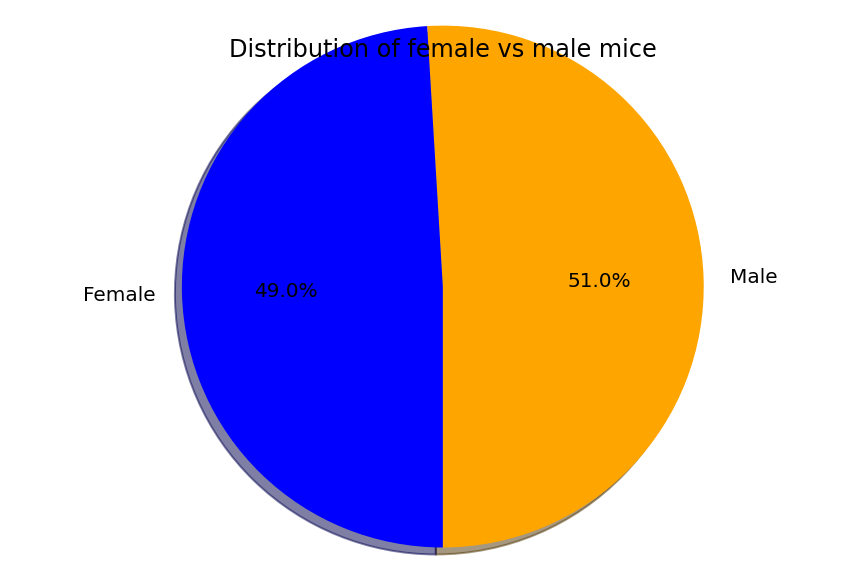

In [30]:
 # Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male", "Female"]
count=gender_count.tolist()
count
colors=["orange","blue"]
explode=(0,0)
fig1, ax1= plt.subplots()
ax1.pie(count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=270, radius=1.5)
plt.title("Distribution of female vs male mice")
plt.show()

In [89]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens= ["Capomulin","Ramicane","Infubinol","Ceftamin"]
regimen_cap= clean_df.loc[clean_df["Drug_regimen"]== "Capomulin"]
regimen_ram= clean_df.loc[clean_df["Drug_regimen"]== "Ramicane"]
regimen_inf= clean_df.loc[clean_df["Drug_regimen"]== "Infubinol"]
regimen_cef= clean_df.loc[clean_df["Drug_regimen"]== "Ceftamin"]

#Capomulin
cap_timepoint=regimen_cap.groupby(["Mouse_id"])["Timepoint"].max()
cap_merge= pd.merge(cap_timepoint, clean_df,on=("Mouse_id", "Timepoint"),how='left')
cap_merge.head()

,Mouse_id,Timepoint,Drug_regimen,Sex,Age_months,Weight,Tumor_volume,Metastatic_sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [90]:
#Ramicane
ram_timepoint= regimen_ram.groupby(["Mouse_id"])["Timepoint"].max()
ram_merge= pd.merge(ram_timepoint, clean_df, on=("Mouse_id","Timepoint"),how='left')
ram_merge.head()

,Mouse_id,Timepoint,Drug_regimen,Sex,Age_months,Weight,Tumor_volume,Metastatic_sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [91]:
#Infubinol
infu_timepoint=regimen_inf.groupby(["Mouse_id"])["Timepoint"].max()
infu_merge=pd.merge(infu_timepoint, clean_df, on=("Mouse_id","Timepoint"), how='left')
infu_merge.head()

,Mouse_id,Timepoint,Drug_regimen,Sex,Age_months,Weight,Tumor_volume,Metastatic_sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [92]:
#Ceftamin
cef_timepoint=regimen_cef.groupby(["Mouse_id"])["Timepoint"].max()
cef_merge=pd.merge(cef_timepoint ,clean_df, on=("Mouse_id","Timepoint"), how='left')
cef_merge.head()

,Mouse_id,Timepoint,Drug_regimen,Sex,Age_months,Weight,Tumor_volume,Metastatic_sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [93]:
# Put treatments into a list for for loop (and later for plot labels)
regimens

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [94]:
#empty list

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for r in regimens:
    print(r)
    tumor_vol_data=[]
    if r=="Capomulin":
        tumor_vol_data= cap_merge["Tumor_volume"]  
    elif r =="Ramicane":
        tumor_vol_data= ram_merge["Tumor_volume"]  
    elif r =="Infubinol":
        tumor_vol_data= infu_merge["Tumor_volume"]
    elif r =="Ceftamin":
        tumor_vol_data= cef_merge["Tumor_volume"]
    
    quartiles = tumor_vol_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"The lower quartile of {r} is: {lowerq}")
    print(f"The upper quartile of {r} is: {upperq}")
    print(f"The interquartile range of {r} is: {iqr}")
    print(f"The median of {r} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print (f"")
 

Capomulin
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Ceftamin
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin i

<IPython.core.display.Javascript object>


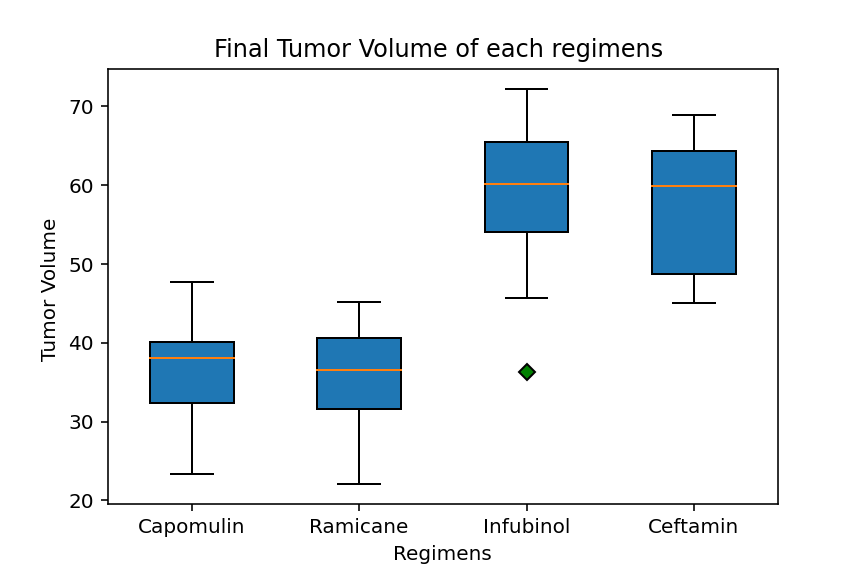

In [95]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_merge_data=[cap_merge["Tumor_volume"],ram_merge["Tumor_volume"],
                  infu_merge["Tumor_volume"], cef_merge["Tumor_volume"]]
regimens

#Write you code to plot on Tumor Merge Data...
fig1, ax1 = plt.subplots()
green_diamond=dict(markerfacecolor='g', marker='D')
ax1.set_title('Final Tumor Volume of each regimens ')
ax1.set_ylabel('Tumor Volume ')
ax1.set_xlabel("Regimens")
ax1.boxplot(tumor_merge_data, labels=regimens,widths=0.5, patch_artist=True, meanline=True, flierprops=green_diamond)
plt.show()

In [127]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_id=regimen_cap.loc[regimen_cap["Mouse_id"]=='s185']
sort_by_time=mouse_id.sort_values(by=['Timepoint'])
y_axis=sort_by_time["Tumor_volume"]
x_axis=sort_by_time["Timepoint"]



<IPython.core.display.Javascript object>


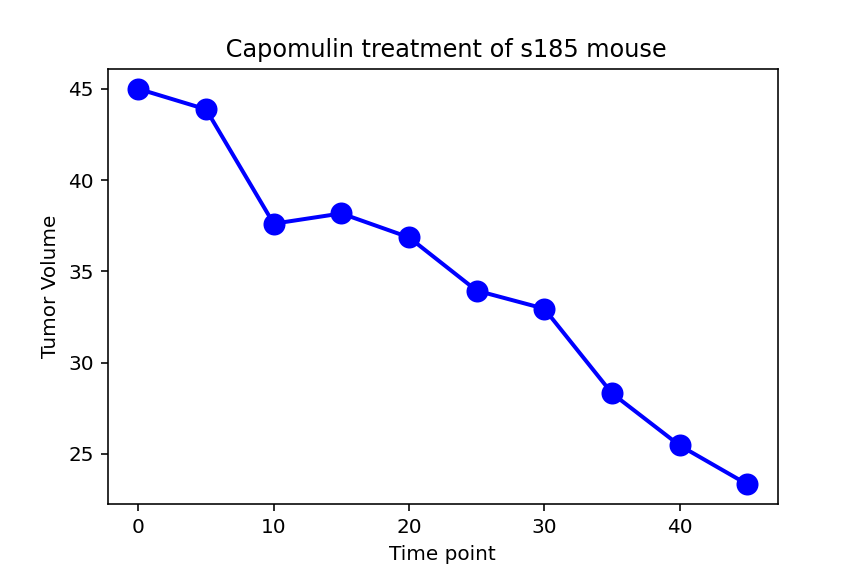

In [128]:
fig2, ax2= plt.subplots()
ax2.plot(x_axis, y_axis, linewidth=2, markersize=10,marker="o", color="blue")
plt.xlabel("Time point")
plt.ylabel("Tumor Volume")
plt.title(" Capomulin treatment of s185 mouse")
plt.show()

<IPython.core.display.Javascript object>


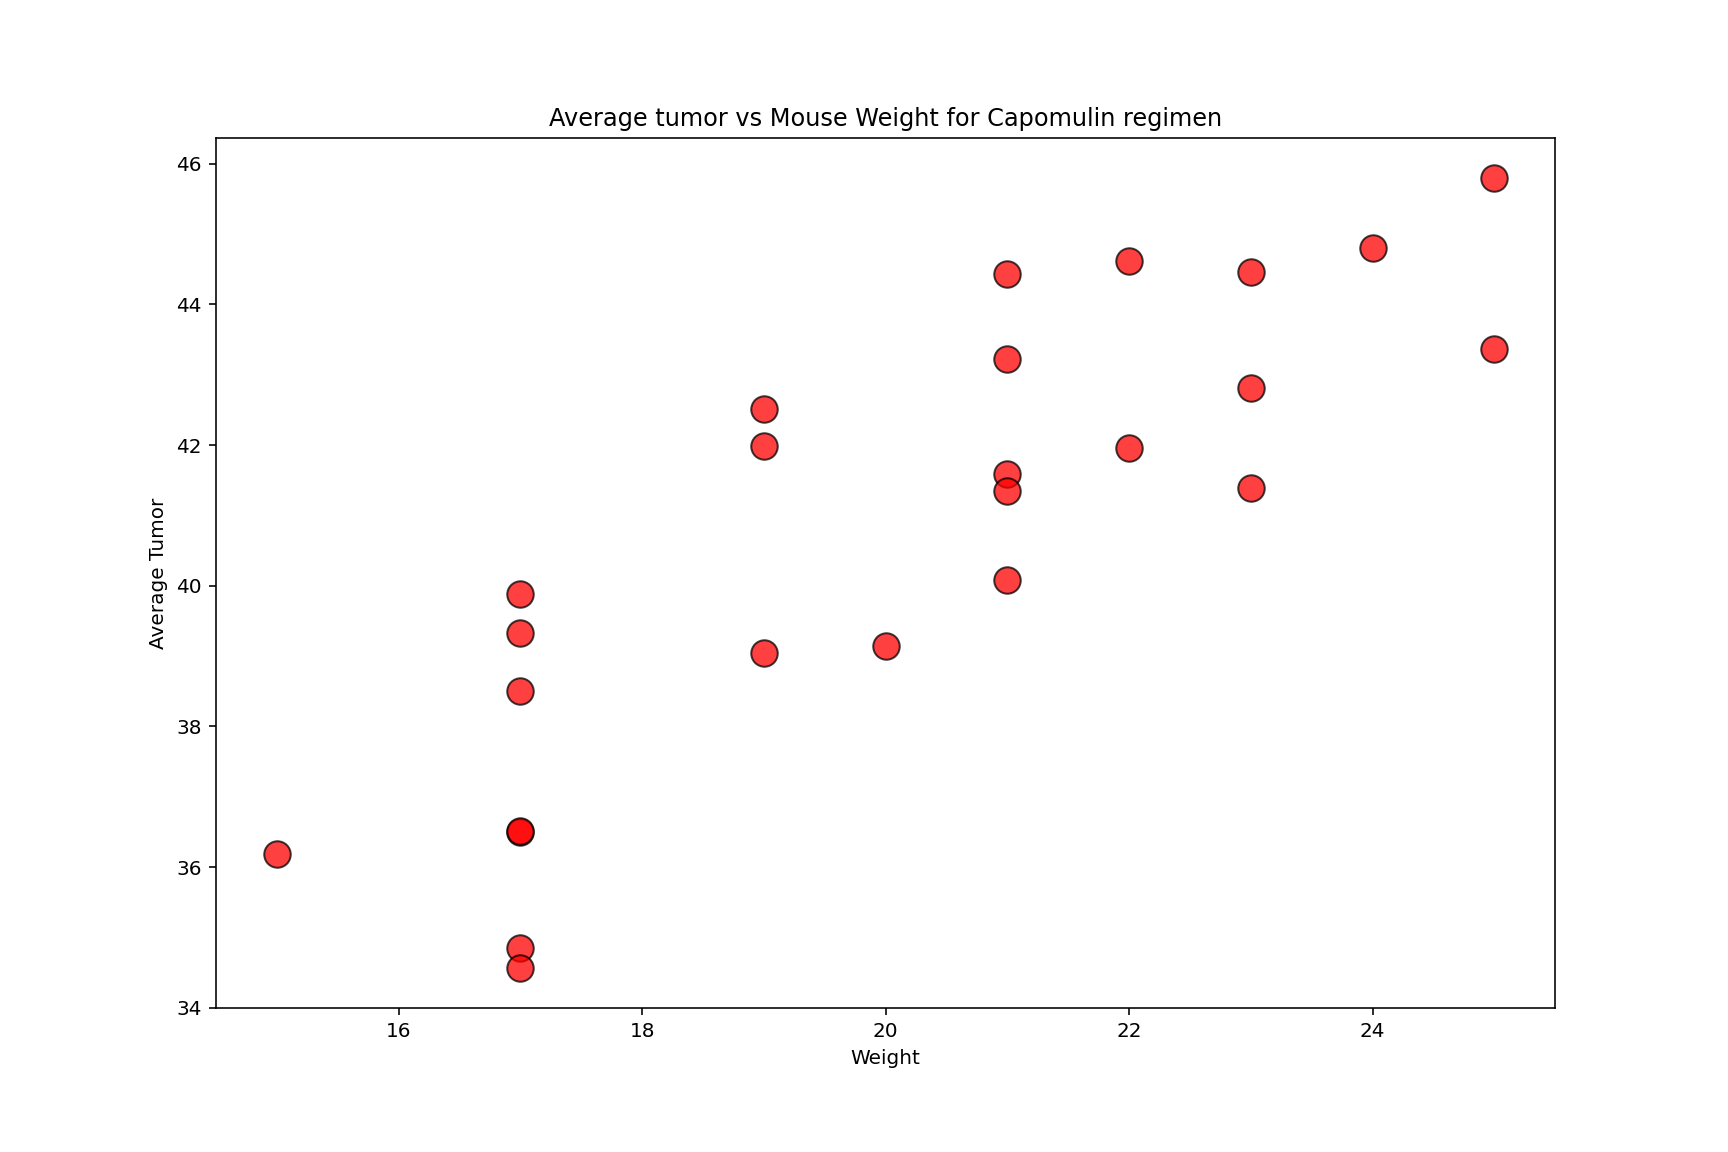

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_cap=regimen_cap.groupby(["Mouse_id"]).mean()
markersize=10
fig3, ax3=plt.subplots()
ax3.scatter(avg_cap["Weight"], avg_cap["Tumor_volume"], marker="o", facecolors="red", edgecolors="black",alpha=0.75,s=175)
plt.title("Average tumor vs Mouse Weight for Capomulin regimen")
plt.xlabel("Weight")
plt.ylabel("Average Tumor")
plt.show()

In [52]:
 # Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
avg_cap
mouse_weight=avg_cap.iloc[:,1]
avg_tumor=avg_cap.iloc[:,3]
correlation=st.pearsonr(mouse_weight,avg_tumor)
print(f"The correlation between mouse weight and average tumor volume for Capomulin is {round(correlation[0],2)}")





The correlation between mouse weight and average tumor volume for Capomulin is 0.84


In [53]:
#Linear Regression model
mouse_weight=avg_cap.iloc[:,1]
avg_tumor=avg_cap.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr)=linregress(mouse_weight, avg_tumor)
regress_values=mouse_weight * slope +intercept
line_eq = ("y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
print(f'slope:{slope}')
print(f'intercept:{intercept}')
print(f'line_eq:{line_eq}')
print(f'rvalue:{rvalue}')


slope:0.9544396890241048
intercept:21.552160532685008
line_eq:y = 0.95x + 21.55
rvalue:0.841936342469472


<IPython.core.display.Javascript object>


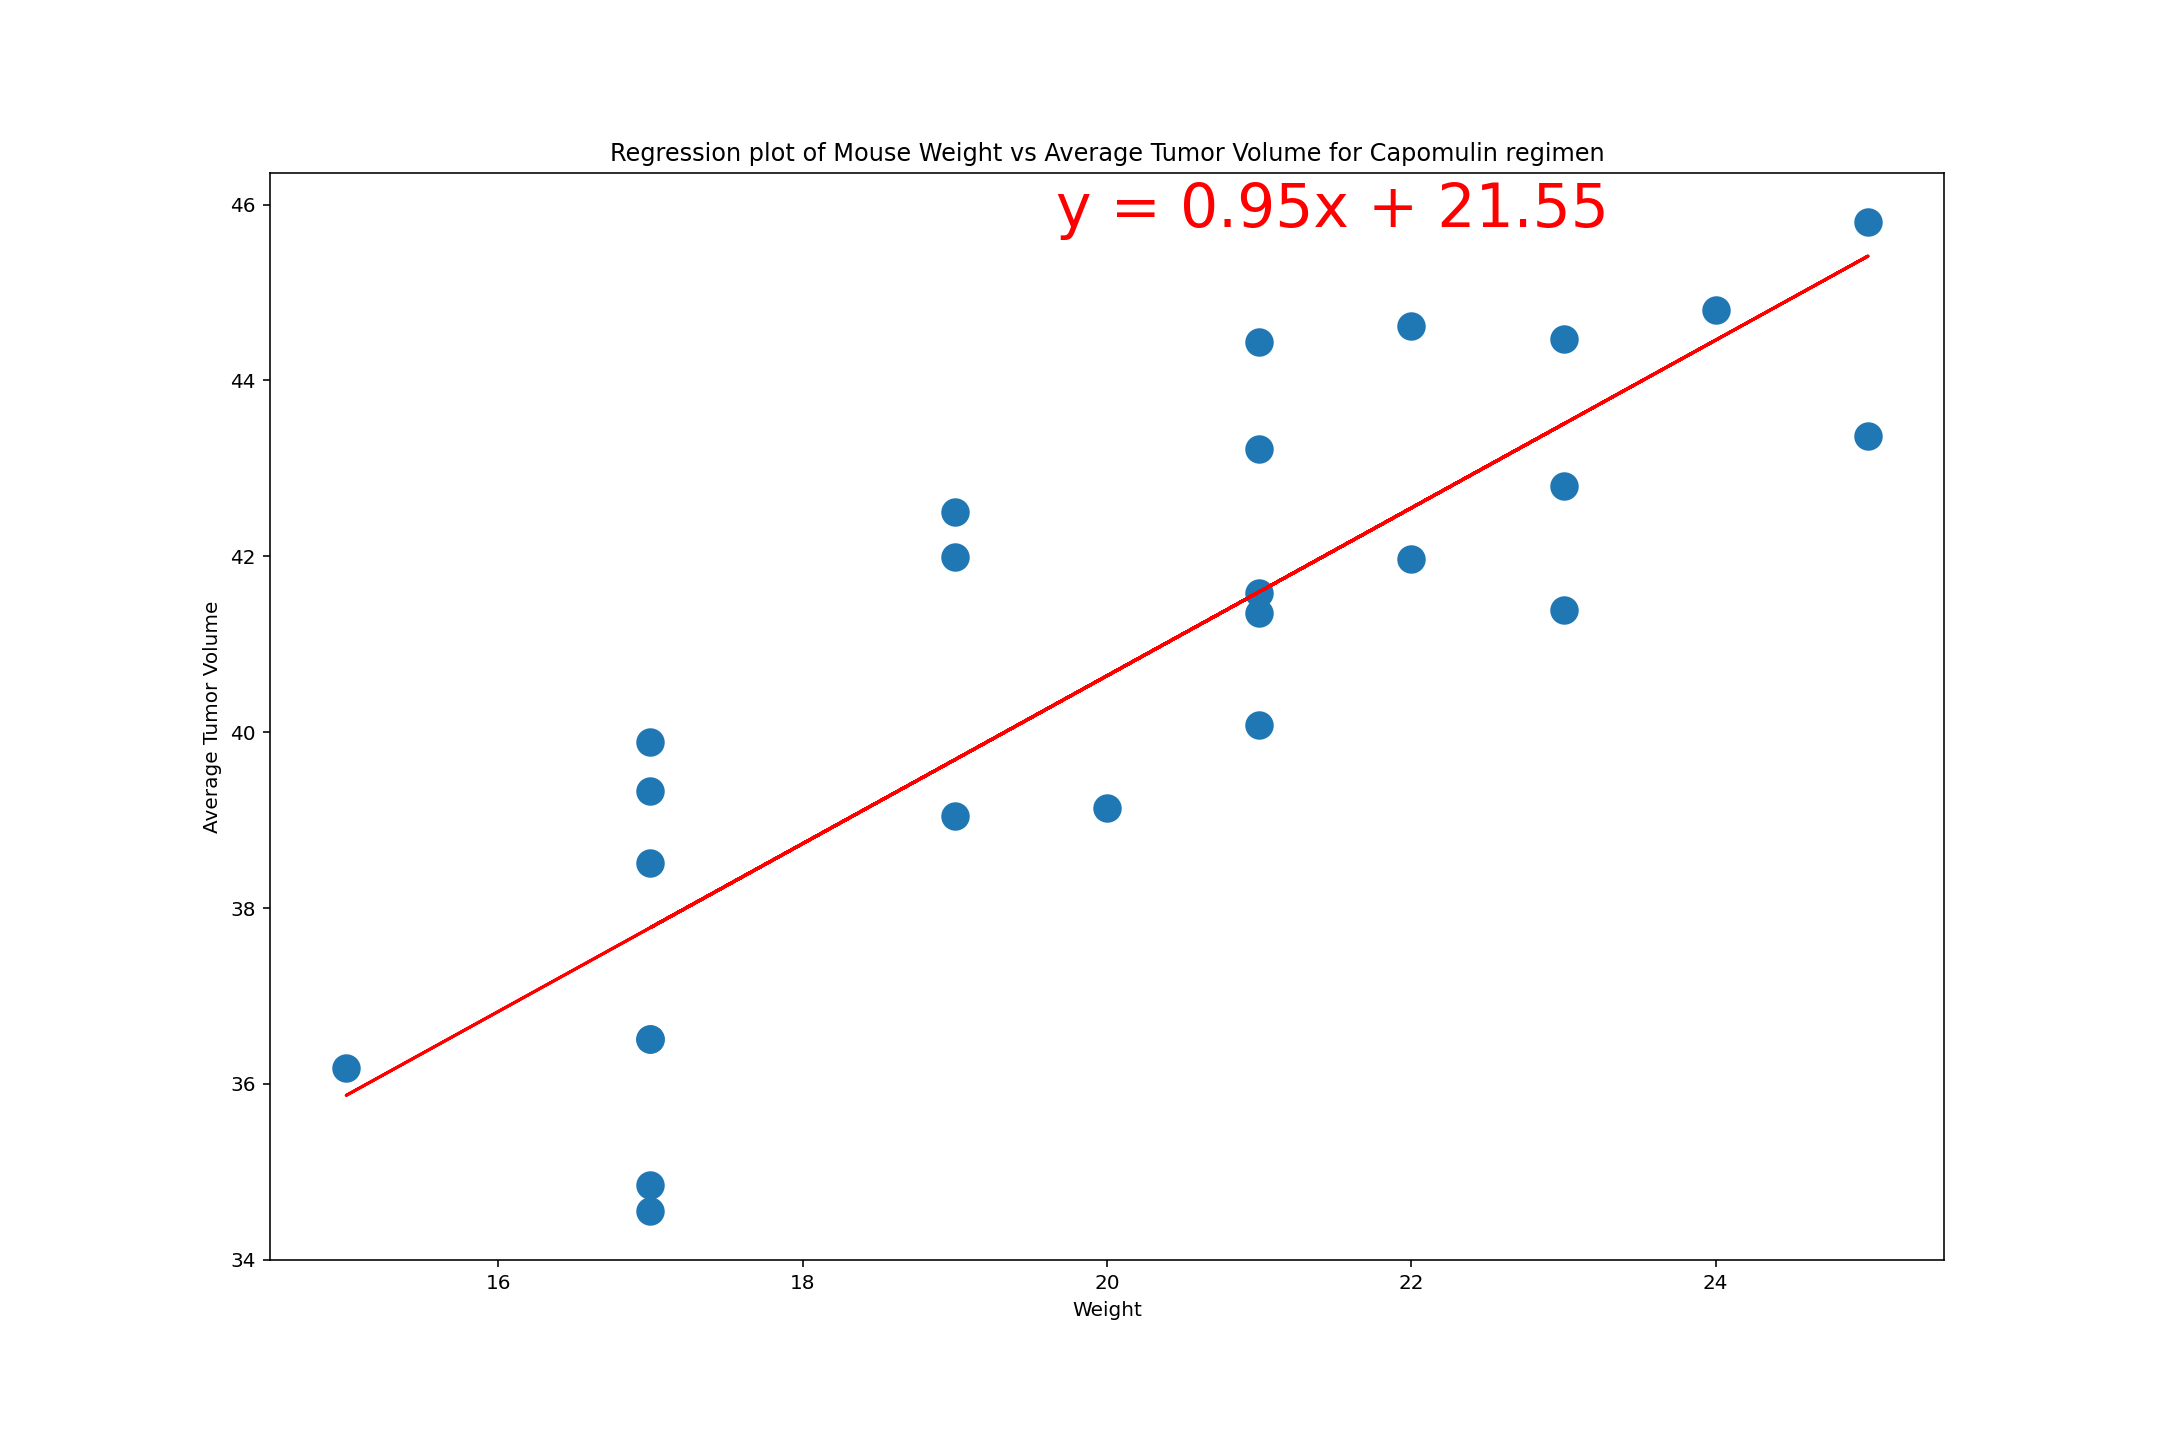

The r-squared is :0.7088568047708721


In [140]:
fig4, ax4=plt.subplots(figsize=(15,10))
plt.scatter(mouse_weight,avg_tumor,s=175)
plt.plot(mouse_weight,regress_values,"r-")
ax4.annotate(line_eq,xy=(20,40),xytext=(0.8,0.95),textcoords='axes fraction',horizontalalignment='right',fontsize=30,color="red")
plt.title("Regression plot of Mouse Weight vs Average Tumor Volume for Capomulin regimen")
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
print(f"The r-squared is :{rvalue**2}")
plt.show()